# k Nearest Neighbours with Python and Scikit-Learn


k Nearest Neighbours is a very simple and one of the topmost machine learning algorithms. In this project, I build a k Nearest Neighbours classifier to classify the patients suffering from Breast Cancer. I have used the `Breast Cancer Wisconsin (Original) Data Set` downloaded from the UCI Machine Learning Repository.

## Table of Contents


1.	Introduction to k Nearest Neighbours Algorithm
2.	k Nearest Neighbours intuition
3.	The problem statement
4.	Dataset description
5.	Import libraries
6.	Import dataset
7.	Exploratory data analysis
8.	Data visualization
9.	Declare feature vector and target variable
10.	Split data into separate training and test set
11.	Feature engineering
12.	Feature scaling
13.	Fit Neighbours classifier to the training set
14.	Predict the test-set results
15.	Check the accuracy score
16.	Rebuild kNN classification model using different values of k
17.	Confusion matrix
18.	Classification metrices
19.	ROC - AUC
20.	k-Fold Cross Validation
21.	Results and conclusion


## 1. Introduction to k Nearest Neighbours algorithm



In machine learning, k Nearest Neighbours or kNN is the simplest of all machine learning algorithms. It is a non-parametric algorithm used for classification and regression tasks. Non-parametric means there is no assumption required for data distribution. So, kNN does not require any underlying assumption to be made. In both classification and regression tasks, the input consists of the k closest training examples in the feature space. The output depends upon whether kNN is used for classification or regression purposes.

-	In kNN classification, the output is a class membership. The given data point is classified based on the majority of type of its neighbours. The data point is assigned to the most frequent class among its k nearest neighbours. Usually k is a small positive integer. If k=1, then the data point is simply assigned to the class of that single nearest neighbour.

-	In kNN regression, the output is simply some property value for the object. This value is the average of the values of k nearest neighbours.


kNN is a type of instance-based learning or lazy learning. Lazy learning means it does not require any training data points for model generation. All training data will be used in the testing phase. This makes training faster and testing slower and costlier. So, the testing phase requires more time and memory resources.

In kNN, the neighbours are taken from a set of objects for which the class or the object property value is known. This can be thought of as the training set for the kNN algorithm, though no explicit training step is required. In both classification and regression kNN algorithm, we can assign weight to the contributions of the neighbours. So, nearest neighbours contribute more to the average than the more distant ones.



## 2. k Nearest Neighbours intuition


The kNN algorithm intuition is very simple to understand. It simply calculates the distance between a sample data point and all the other training data points. The distance can be Euclidean distance or Manhattan distance. Then, it selects the k nearest data points where k can be any integer. Finally, it assigns the sample data point to the class to which the majority of the k data points belong.


Now, we will see kNN algorithm in action. Suppose, we have a dataset with two variables which are classified as `Red` and `Blue`.


In kNN algorithm, k is the number of nearest neighbours. Generally, k is an odd number because it helps to decide the majority of the class. When k=1, then the algorithm is known as the nearest neighbour algorithm.

Now, we want to classify a new data point `X` into `Blue` class or `Red` class. Suppose the value of k is 3. The kNN algorithm starts by calculating the distance between `X` and all the other data points. It then finds the 3 nearest points with least distance to point `X`. 


In the final step of the kNN algorithm, we assign the new data point `X` to the majority of the class of the 3 nearest points. If 2 of the 3 nearest points belong to the class `Red` while 1 belong to the class `Blue`, then we classify the new data point  as `Red`.


## 3. The problem statement


In this project, I try to classify the patients suffering from breast cancer. I implement kNN algorithm with Python and Scikit-Learn. 


To answer the question, I build a kNN classifier to predict whether or not a patient is suffering from breast cancer. I have used the **Breast Cancer Wisconsin (Original) Data Set** downloaded from the UCI Machine Learning Repository for this project.

## 4. Dataset description


I have used the **Breast Cancer Wisconsin (Original) Data Set** downloaded from the UCI Machine Learning Repository for this project.


The data set can be found at the following url:-


https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)


This dataset contains the patient samples that arrive periodically as Dr. Wolberg reports his clinical cases. 


The attribute information of this dataset is as follows:-

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)



## 5. Import libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
import warnings

warnings.filterwarnings('ignore')

## 6. Import dataset

In [93]:
data = r'C:\MSA\Python classes\85 hours\data analysis project assignment\k-Nearest-Neighbours-Project\data\data.csv'

df = pd.read_csv(data, header=None)

## 7. Exploratory data analysis


Now, I will explore the data to gain insights about the data. 

In [94]:
# view dimensions of dataset

df.shape

(570, 33)

We can see that there are 699 instances and 11 attributes in the data set. 


In the dataset description, it is given that there are 10 attributes and 1 `Class` which is the target variable. So, we have 10 attributes and 1 target variable.

### View top 5 rows of dataset

In [95]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,NaN
1,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN
2,842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902,NaN
3,84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,...,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,NaN
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,NaN


In [100]:
df=df.iloc[2:,:12]
df.drop(df.columns[1],axis=1,inplace=True)

In [101]:
df.head()

,0,2,3,4,5,6,7,8,9,10,11
6,843786,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613
7,844359,18.25,19.98,119.6,1040,0.09463,0.109,0.1127,0.074,0.1794,0.05742
8,84458202,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451
9,844981,13,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389
10,84501001,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.203,0.08243


In [102]:
df.shape

(564, 11)

### Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [103]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
#col_names=['id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
#             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class',"fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst","raw"]

df.columns = col_names

df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

We can see that the column names are renamed. Now, the columns have meaningful names.

In [104]:
# let's agian preview the dataset

df.head()

df=df.iloc[2:,:11]
#df=df.loc[:0,9]
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
8,84458202,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451
9,844981,13,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389
10,84501001,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.203,0.08243
11,845636,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697
12,84610002,15.78,17.89,103.6,781,0.0971,0.1292,0.09954,0.06606,0.1842,0.06082


### Drop redundant columns


We should drop any redundant columns from the dataset which does not have any predictive power. Here, `Id` is the redundant column. So, I will drop it first.

In [131]:
def applyadd1(x):
    x=str(x)+1
    #df['Class']=str(df['Class'])+1
df['Class']=(df['Class'].astype(float))
df['Class']=df['Class']+1
print(df.head())
# drop Id column from dataset

df.drop('Id', axis=1, inplace=True)

   Clump_thickness Uniformity_Cell_Size Uniformity_Cell_Shape  \
8            13.71                20.83                  90.2   
9               13                21.82                  87.5   
10           12.46                24.04                 83.97   
11           16.02                23.24                 102.7   
12           15.78                17.89                 103.6   

   Marginal_Adhesion Single_Epithelial_Cell_Size  Bare_Nuclei Bland_Chromatin  \
8              577.9                      0.1189      0.16450         0.09366   
9              519.8                      0.1273      0.19320          0.1859   
10             475.9                      0.1186      0.23960          0.2273   
11             797.8                     0.08206      0.06669         0.03299   
12               781                      0.0971      0.12920         0.09954   

   Normal_Nucleoli Mitoses    Class  
8          0.05985  0.2196  1.07451  
9          0.09353   0.235  1.07389  
10      

KeyError: "['Id'] not found in axis"

### View summary of dataset


In [132]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 8 to 569
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              562 non-null    object 
 1   Uniformity_Cell_Size         562 non-null    object 
 2   Uniformity_Cell_Shape        562 non-null    object 
 3   Marginal_Adhesion            562 non-null    object 
 4   Single_Epithelial_Cell_Size  562 non-null    object 
 5   Bare_Nuclei                  562 non-null    float64
 6   Bland_Chromatin              562 non-null    object 
 7   Normal_Nucleoli              562 non-null    object 
 8   Mitoses                      562 non-null    object 
 9   Class                        562 non-null    float64
dtypes: float64(2), object(8)
memory usage: 44.0+ KB


We can see that the `Id` column has been removed from the dataset. 

We can see that there are 9 numerical variables and 1 categorical variable in the dataset. I will check the frequency distribution of values in the variables to confirm the same.

### Frequency distribution of values in variables

In [133]:
for var in df.columns:
    
    print(df[var].value_counts())


12.34    4
12.77    3
11.71    3
13       3
15.46    3
        ..
14.03    1
9.567    1
20.51    1
10.95    1
7.76     1
Name: Clump_thickness, Length: 451, dtype: int64
18.22    3
17.46    3
19.83    3
20.52    3
18.9     3
        ..
15.9     1
17.39    1
17.19    1
18.58    1
24.54    1
Name: Uniformity_Cell_Size, Length: 475, dtype: int64
87.76    3
134.7    3
82.61    3
152.1    2
82.69    2
        ..
158.9    1
115.1    1
78.54    1
94.49    1
47.92    1
Name: Uniformity_Cell_Shape, Length: 517, dtype: int64
512.2    3
641.2    2
575.3    2
399.8    2
716.6    2
        ..
588.9    1
516.4    1
671.4    1
477.4    1
181      1
Name: Marginal_Adhesion, Length: 532, dtype: int64
0.1007     5
0.115      4
0.1054     4
0.1075     4
0.08511    3
          ..
0.0909     1
0.08182    1
0.1002     1
0.08876    1
0.05263    1
Name: Single_Epithelial_Cell_Size, Length: 470, dtype: int64
0.12060    3
0.11470    3
0.09509    2
0.03834    2
0.11170    2
          ..
0.24130    1
0.07253    1

The distribution of values shows that data type of `Bare_Nuclei` is of type integer. But the summary of the dataframe shows that it is type object. So, I will explicitly convert its data type to integer.

### Convert data type of Bare_Nuclei to integer

In [134]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

### Check data types of columns of dataframe

In [135]:
df.dtypes

Clump_thickness                 object
Uniformity_Cell_Size            object
Uniformity_Cell_Shape           object
Marginal_Adhesion               object
Single_Epithelial_Cell_Size     object
Bare_Nuclei                    float64
Bland_Chromatin                 object
Normal_Nucleoli                 object
Mitoses                         object
Class                          float64
dtype: object

Now, we can see that all the columns of the dataframe are of type numeric.

### Summary of variables


- There are 10 numerical variables in the dataset.


- All of the variables are of discrete type.


- Out of all the 10 variables, the first 9 variables are feature variables and last variable `Class` is the target variable.




### Explore problems within variables


Now, I will explore problems within variables.


### Missing values in variables

In [136]:
# check missing values in variables

df.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

We can see that the `Bare_Nuclei` column contains missing values. We need to dig deeper to find the frequency distribution of 
values of `Bare_Nuclei`.

In [137]:
# check `na` values in the dataframe

df.isna().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

We can see that the `Bare_Nuclei` column contains 16 `nan` values.

In [138]:
# check frequency distribution of `Bare_Nuclei` column

df['Bare_Nuclei'].value_counts()

0.12060    3
0.11470    3
0.09509    2
0.03834    2
0.11170    2
          ..
0.24130    1
0.07253    1
0.05562    1
0.06141    1
0.04362    1
Name: Bare_Nuclei, Length: 532, dtype: int64

In [139]:
# check unique values in `Bare_Nuclei` column

df['Bare_Nuclei'].unique()

array([0.1645 , 0.1932 , 0.2396 , 0.06669, 0.1292 , 0.2458 , 0.1002 ,
       0.2293 , 0.1595 , 0.072  , 0.2022 , 0.1027 , 0.08129, 0.127  ,
       0.06492, 0.2135 , 0.1022 , 0.1457 , 0.2276 , 0.1868 , 0.1066 ,
       0.1697 , 0.1157 , 0.1887 , 0.1516 , 0.1496 , 0.1719 , 0.1559 ,
       0.1336 , 0.1098 , 0.03766, 0.05131, 0.1255 , 0.06031, 0.1218 ,
       0.219  , 0.1436 , 0.1047 , 0.1686 , 0.05943, 0.1231 , 0.09092,
       0.07698, 0.04966, 0.06059, 0.04751, 0.1485 , 0.07081, 0.05473,
       0.1267 , 0.1365 , 0.03789, 0.05272, 0.08061, 0.08963, 0.2008 ,
       0.08751, 0.1262 , 0.1479 , 0.07773, 0.04701, 0.1413 , 0.05234,
       0.1029 , 0.1531 , 0.183  , 0.128  , 0.06829, 0.08424, 0.2146 ,
       0.3454 , 0.09546, 0.09362, 0.1535 , 0.2665 , 0.1791 , 0.07165,
       0.1053 , 0.09947, 0.1206 , 0.09445, 0.1339 , 0.08606, 0.1036 ,
       0.05055, 0.08165, 0.1553 , 0.1313 , 0.07057, 0.05301, 0.07525,
       0.1141 , 0.08511, 0.07568, 0.04038, 0.09697, 0.08578, 0.1765 ,
       0.1017 , 0.06

We can see that there are `nan` values in the `Bare_Nuclei` column.

In [140]:
# check for nan values in `Bare_Nuclei` column

df['Bare_Nuclei'].isna().sum()

0

We can see that there are 16 `nan` values in the dataset. I will impute missing values after dividing the dataset into training and test set.

### check frequency distribution of target variable `Class`

In [141]:
# view frequency distribution of values in `Class` variable

df['Class'].value_counts()

1.05913    3
1.06782    3
1.06113    3
1.05907    3
1.06331    2
          ..
1.06217    1
1.07398    1
1.05770    1
1.06133    1
1.07016    1
Name: Class, Length: 494, dtype: int64

### check  percentage of frequency distribution of `Class`

In [142]:
# view percentage of frequency distribution of values in `Class` variable

df['Class'].value_counts()/np.float(len(df))

1.05913    0.005338
1.06782    0.005338
1.06113    0.005338
1.05907    0.005338
1.06331    0.003559
             ...   
1.06217    0.001779
1.07398    0.001779
1.05770    0.001779
1.06133    0.001779
1.07016    0.001779
Name: Class, Length: 494, dtype: float64

We can see that the `Class` variable contains 2 class labels - `2` and `4`. `2` stands for benign and `4` stands for malignant cancer.

### Outliers in numerical variables

In [143]:
# view summary statistics in numerical variables

print(round(df.describe(),2))

       Bare_Nuclei   Class
count       562.00  562.00
mean          0.10    1.06
std           0.05    0.01
min           0.02    1.05
25%           0.06    1.06
50%           0.09    1.06
75%           0.13    1.07
max           0.35    1.10


kNN algorithm is robust to outliers.

## 8. Data Visualization


Now, we have a basic understanding of our data. I will supplement it with some data visualization to get better understanding
of our data.

### Univariate plots

### Check the distribution of variables


Now, I will plot the histograms to check variable distributions to find out if they are normal or skewed. 

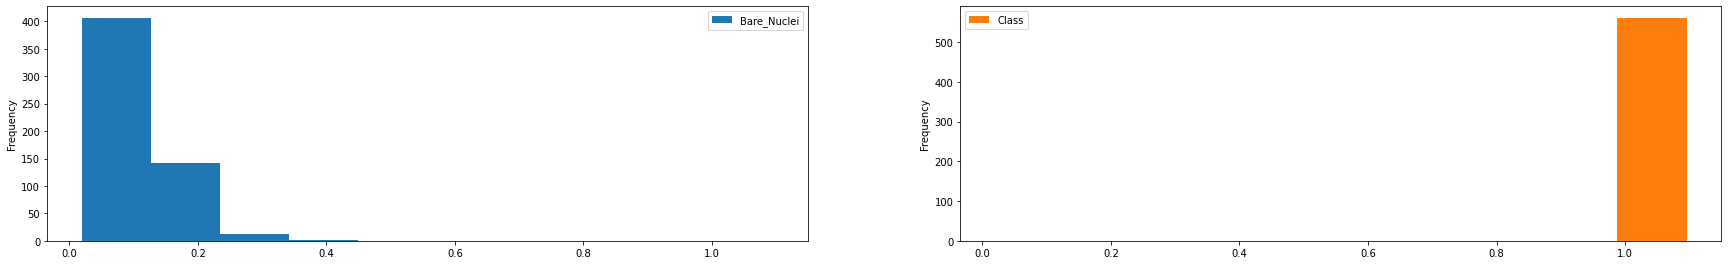

In [144]:
# plot histograms of the variables


plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

We can see that all the variables in the dataset are positively skewed. 

### Multivariate plots

### Estimating correlation coefficients

Our dataset is very small. So, we can compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes. We can compute it using the `df.corr()` method as follows:-

In [145]:
correlation = df.corr()

Our target variable is `Class`. So, we should check how each attribute correlates with the `Class` variable. We can do it as follows:-

In [146]:
correlation['Class'].sort_values(ascending=False)

Class          1.000000
Bare_Nuclei    0.548417
Name: Class, dtype: float64

### Interpretation 

- The correlation coefficient ranges from -1 to +1. 

- When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is a strong positive correlation between `Class` and `Bare_Nuclei`, `Class` and `Uniformity_Cell_Shape`, `Class` and `Uniformity_Cell_Size`.

- When it is clsoe to -1, it means that there is a strong negative correlation. When it is close to 0, it means that there is no correlation. 

- We can see that all the variables are positively correlated with `Class` variable. Some variables are strongly positive correlated while some variables are negatively correlated.

### Discover patterns and relationships 


An important step in EDA is to discover patterns and relationships between variables in the dataset. I will use the seaborn heatmap to explore the patterns and relationships in the dataset.


### Correlation Heat Map

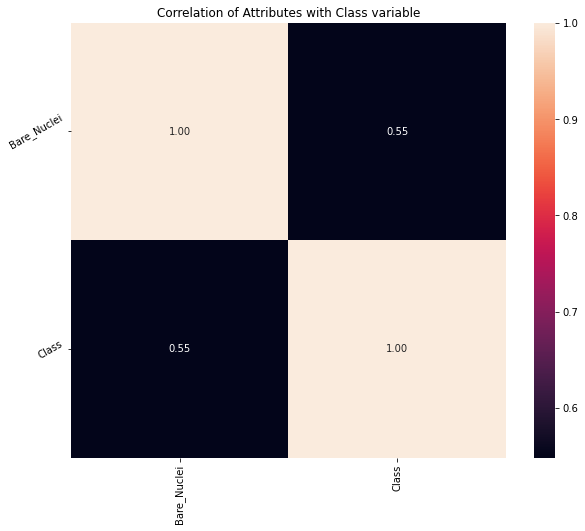

In [147]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

### Interpretation


From the above correlation heat map, we can conclude that :-

1. `Class` is highly positive correlated with `Uniformity_Cell_Size`, `Uniformity_Cell_Shape` and `Bare_Nuclei`. (correlation coefficient = 0.82).

2. `Class` is positively correlated with `Clump_thickness`(correlation coefficient=0.72), `Marginal_Adhesion`(correlation coefficient=0.70), `Single_Epithelial_Cell_Size)`(correlation coefficient = 0.68) and `Normal_Nucleoli`(correlation coefficient=0.71).

3. `Class` is weekly positive correlated with `Mitoses`(correlation coefficient=0.42).

4. The `Mitoses` variable is weekly positive correlated with all the other variables(correlation coefficient < 0.50).

## 9. Declare feature vector and target variable

In [148]:
X = df.drop(['Class'], axis=1)

y = df['Class']

## 10. Split data into separate training and test set

In [149]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [150]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((449, 9), (113, 9))

## 11. Feature Engineering


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


In [151]:
# check data types in X_train

X_train.dtypes

Clump_thickness                 object
Uniformity_Cell_Size            object
Uniformity_Cell_Shape           object
Marginal_Adhesion               object
Single_Epithelial_Cell_Size     object
Bare_Nuclei                    float64
Bland_Chromatin                 object
Normal_Nucleoli                 object
Mitoses                         object
dtype: object

### Engineering missing values in variables



In [152]:
# check missing values in numerical variables in X_train

X_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [153]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [154]:
# print percentage of missing values in the numerical variables in training set

for col in X_train.columns:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

### Assumption


I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.


I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In [155]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)           
      

In [156]:
# check again missing values in numerical variables in X_train

X_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [157]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

We can see that there are no missing values in X_train and X_test.

In [158]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
464,11.6,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,0.1516
216,13.86,16.93,90.96,578.9,0.1026,0.15170,0.09901,0.05602,0.2106
121,11.41,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.02623,0.1667
202,17.54,19.32,115.1,951.6,0.08968,0.11980,0.1036,0.07488,0.1506
84,19.1,26.29,129.1,1132,0.1215,0.17910,0.1937,0.1469,0.1634


In [159]:
X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
513,13.4,20.52,88.64,556.7,0.1106,0.14690,0.1445,0.08172,0.2116
416,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,0.2019
74,13.8,15.79,90.43,584.1,0.1007,0.12800,0.07789,0.05069,0.1662
346,10.26,14.71,66.2,321.6,0.09882,0.09159,0.03581,0.02037,0.1633
241,13.64,15.6,87.38,575.3,0.09423,0.06630,0.04705,0.03731,0.1717


We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called `feature scaling`. I will do it as follows.

## 12. Feature Scaling

In [160]:
cols = X_train.columns

In [161]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [162]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [163]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [164]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,-0.691969,-0.221806,-0.719151,-0.666256,-0.786791,-0.870298,-0.677234,-0.786738,-1.059551
1,-0.047740,-0.553937,-0.011886,-0.191335,0.509173,0.983288,0.159436,0.225487,1.104413
2,-0.746130,-1.973044,-0.741512,-0.693116,-0.146946,-0.705137,-0.658667,-0.562858,-0.505723
3,1.001271,0.001164,0.987727,0.873666,-0.446527,0.348512,0.218210,0.724587,-1.096228
4,1.445960,1.620015,1.567452,1.389164,1.907217,1.528519,1.371929,2.630482,-0.626758


We now have `X_train` dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

## 13. Fit K Neighbours Classifier to the Training Set

In [165]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(X_train, y_train)


ValueError: Unknown label type: 'continuous'

## 14. Predict the test-set results

In [ ]:
y_pred = knn.predict(X_test)

y_pred

### predict_proba method


**predict_proba** method gives the probabilities for the target variable(2 and 4) in this case, in array form.

`2 is for probability of benign cancer` and `4 is for probability of malignant cancer.`

In [ ]:
# probability of getting output as 2 - benign cancer

knn.predict_proba(X_test)[:,0]

In [ ]:
# probability of getting output as 4 - malignant cancer

knn.predict_proba(X_test)[:,1]

## 15. Check the accuracy score

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
y_pred_train = knn.predict(X_train)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

### Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

The training-set accuracy score is 0.9821 while the test-set accuracy to be 0.9714. These two values are quite comparable. So, there is no question of overfitting. 


### Compare model accuracy with null accuracy


So, the model accuracy is 0.9714. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set. 

In [ ]:
# check class distribution in test set

y_test.value_counts()

We can see that the occurences of most frequent class is 85. So, we can calculate null accuracy by dividing 85 by total number of occurences.

In [ ]:
# check null accuracy score

null_accuracy = (85/(85+55))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

We can see that our model accuracy score is 0.9714 but null accuracy score is 0.6071. So, we can conclude that our K Nearest Neighbors model is doing a very good job in predicting the class labels.

## 16. Rebuild kNN Classification model using different values of k


I have build the kNN classification model using k=3. Now, I will increase the value of k and see its effect on accuracy.

### Rebuild kNN Classification model using k=5

In [ ]:
# instantiate the model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn_5.fit(X_train, y_train)


# predict on the test-set
y_pred_5 = knn_5.predict(X_test)


print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

### Rebuild kNN Classification model using k=6

In [ ]:
# instantiate the model with k=6
knn_6 = KNeighborsClassifier(n_neighbors=6)


# fit the model to the training set
knn_6.fit(X_train, y_train)


# predict on the test-set
y_pred_6 = knn_6.predict(X_test)


print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

### Rebuild kNN Classification model using k=7

In [ ]:
# instantiate the model with k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)


# fit the model to the training set
knn_7.fit(X_train, y_train)


# predict on the test-set
y_pred_7 = knn_7.predict(X_test)


print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

### Rebuild kNN Classification model using k=8

In [ ]:
# instantiate the model with k=8
knn_8 = KNeighborsClassifier(n_neighbors=8)


# fit the model to the training set
knn_8.fit(X_train, y_train)


# predict on the test-set
y_pred_8 = knn_8.predict(X_test)


print('Model accuracy score with k=8 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

### Rebuild kNN Classification model using k=9

In [ ]:
# instantiate the model with k=9
knn_9 = KNeighborsClassifier(n_neighbors=9)


# fit the model to the training set
knn_9.fit(X_train, y_train)


# predict on the test-set
y_pred_9 = knn_9.predict(X_test)


print('Model accuracy score with k=9 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

### Interpretation


Our original model accuracy score with k=3 is 0.9714. Now, we can see that we get same accuracy score of 0.9714 with k=5. But, if we increase the value of k further, this would result in enhanced accuracy.


With k=6,7,8 we get accuracy score of 0.9786. So, it results in performance improvement.


If we increase k to 9, then accuracy decreases again to 0.9714.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

## 17. Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [ ]:
# Print the Confusion Matrix with k =3 and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

The confusion matrix shows `83 + 53 = 136 correct predictions` and `2 + 2 = 4 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 83


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 53


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 2 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 2 `(Type II error)`

In [ ]:
# Print the Confusion Matrix with k =7 and slice it into four pieces

cm_7 = confusion_matrix(y_test, y_pred_7)

print('Confusion matrix\n\n', cm_7)

print('\nTrue Positives(TP) = ', cm_7[0,0])

print('\nTrue Negatives(TN) = ', cm_7[1,1])

print('\nFalse Positives(FP) = ', cm_7[0,1])

print('\nFalse Negatives(FN) = ', cm_7[1,0])

The above confusion matrix shows `83 + 54 = 137 correct predictions` and `2 + 1 = 4 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 83


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 54


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 2 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 1 `(Type II error)`

### Comment


So, kNN Classification model with k=7 shows more accurate predictions and less number of errors than k=3 model. Hence, we got performance improvement with k=7.

In [ ]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_7, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## 18. Classification metrices

### Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_7))

### Classification accuracy

In [ ]:
TP = cm_7[0,0]
TN = cm_7[1,1]
FP = cm_7[0,1]
FN = cm_7[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


### Classification error

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


### Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, `precision` can be defined as the ratio of `TP to (TP + FP)`.


In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


### Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, `recall` can be given as the ratio of `TP to (TP + FN)`.



In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

### True Positive Rate


**True Positive Rate** is synonymous with **Recall**.


In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

### False Positive Rate

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

### Specificity

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

### f1-score


**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst 
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to 
compare classifier models, not global accuracy.


### Support


**Support** is the actual number of occurrences of the class in our dataset.

### Adjusting the classification threshold level

In [ ]:
# print the first 10 predicted probabilities of two classes- 2 and 4

y_pred_prob = knn.predict_proba(X_test)[0:10]

y_pred_prob

### Observations


- In each row, the numbers sum to 1.


- There are 2 columns which correspond to 2 classes - 2 and 4. 


    - Class 2 - predicted probability that there is benign cancer.    
    
    - Class 4 - predicted probability that there is malignant cancer.
        
    
- Importance of predicted probabilities

    - We can rank the observations by probability of benign or malignant cancer.


- predict_proba process

    - Predicts the probabilities    
    
    - Choose the class with the highest probability    
    
    
- Classification threshold level

    - There is a classification threshold level of 0.5.    
    
    - Class 4 - probability of malignant cancer is predicted if probability > 0.5.    
    
    - Class 2 - probability of benign cancer is predicted if probability < 0.5.    
    


In [ ]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - benign cancer (2)', 'Prob of - malignant cancer (4)'])

y_pred_prob_df

In [ ]:
# print the first 10 predicted probabilities for class 4 - Probability of malignant cancer

knn.predict_proba(X_test)[0:10, 1]

In [ ]:
# store the predicted probabilities for class 4 - Probability of malignant cancer

y_pred_1 = knn.predict_proba(X_test)[:, 1]

In [ ]:
# plot histogram of predicted probabilities


# adjust figure size
plt.figure(figsize=(6,4))


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred_1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of malignant cancer')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of malignant cancer')
plt.ylabel('Frequency')

### Observations


- We can see that the above histogram is positively skewed.


- The first column tell us that there are approximately 80 observations with 0 probability of malignant cancer.


- There are few observations with probability > 0.5.


- So, these few observations predict that there will be malignant cancer.


### Comments


- In binary problems, the threshold of 0.5 is used by default to convert predicted probabilities into class predictions.


- Threshold can be adjusted to increase sensitivity or specificity. 


- Sensitivity and specificity have an inverse relationship. Increasing one would always decrease the other and vice versa.


- Adjusting the threshold level should be one of the last step you do in the model-building process.

## 19. ROC - AUC



### ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.




**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of **TP to (TP + FN)**.





**False Positive Rate (FPR)** is defined as the ratio of **FP to (FP + TN)**.




In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).




In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_1, pos_label=4)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Breast Cancer kNN classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

### ROC  AUC


**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 


So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

### Interpretation


- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it is benign or malignant cancer.

In [ ]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(knn_7, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

### Interpretation

Our Cross Validated ROC AUC is very close to 1. So, we can conclude that, the KNN classifier is indeed a very good model.

## 20. k-fold Cross Validation


In this section, I will apply k-fold Cross Validation technique to improve the model performance. Cross-validation is a statistical method of evaluating generalization performance It is more stable and thorough than using a train-test split to evaluate model performance. 

In [ ]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_7, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

We can summarize the cross-validation accuracy by calculating its mean.

In [ ]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

### Interpretation


- Using the mean cross-validation, we can conclude that we expect the model to be around 96.46 % accurate on average.

- If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively high variance in the accuracy between folds, ranging from 100% accuracy to 87.72% accuracy. So, we can conclude that the model is very dependent on the particular folds used for training, but it also be the consequence of the small size of the dataset.

- We can see that 10-fold cross-validation accuracy does not result in performance improvement for this model.

## 21. Results and conclusion



1. In this project, I build a kNN classifier model to classify the patients suffering from breast cancer. The model yields very good performance as indicated by the model accuracy which was found to be 0.9786 with k=7.

2. With k=3, the training-set accuracy score is 0.9821 while the test-set accuracy to be 0.9714. These two values are quite comparable. So, there is no question of overfitting. 

3. I have compared the model accuracy score which is 0.9714 with null accuracy score which is 0.6071. So, we can conclude that our K Nearest Neighbors model is doing a very good job in predicting the class labels.

4. Our original model accuracy score with k=3 is 0.9714. Now, we can see that we get same accuracy score of 0.9714 with k=5. But, if we increase the value of k further, this would result in enhanced accuracy. With k=6,7,8 we get accuracy score of 0.9786. So, it results in performance improvement. If we increase k to 9, then accuracy decreases again to 0.9714. So, we can conclude that our optimal value of k is 7.

5. kNN Classification model with k=7 shows more accurate predictions and less number of errors than k=3 model. Hence, we got performance improvement with k=7.

6. ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it is benign or malignant cancer.

7. Using the mean cross-validation, we can conclude that we expect the model to be around 96.46 % accurate on average.

8. If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively high variance in the accuracy between folds, ranging from 100% accuracy to 87.72% accuracy. So, we can conclude that the model is very dependent on the particular folds used for training, but it also be the consequence of the small size of the dataset.
